# Exploratory Data Analysis

Import dependencies, define a method

In [1]:
import os
from math import isnan

import pandas as pd
# import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# %load_ext Cython
# import numba
# numba.set_num_threads(4)
# import pyarrow as pa
# import pyarrow.parquet as pq
# sns.set_theme()

pd.options.display.max_rows = 100
pd.options.display.max_columns = 999

LABEL_COLUMN_NAME = 'price'

### Load the data into a Pandas dataframe

Define the path to the dataset file

Define the name of the label column

In [2]:
input_filename = os.path.join(os.getcwd(), "data", "airbnb_readytofit.csv.gz")
df = pd.read_csv(input_filename, header=0,
                  dtype_backend='pyarrow',
                  engine='pyarrow')

Preview the first 5 rows

In [3]:
df.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,False,True,True,True,False,-0.578829,-2.845589,-0.054298,-0.054298,-1.007673,-0.337606,-0.008295,-0.586591,-0.030031,0.442362,-0.006046,0.426669,0.242309,-0.026744,-0.041001,0.255106,-0.03561,-0.356395,0.656954,0.873381,1.494669,0.291485,-0.409357,-0.433131,0.032654,0.011584,-0.123804,-0.038834,0.263662,-0.458809,-0.204236,-0.09812,-0.217119,-0.109127,-0.321256,1.888373,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,False,True,True,True,False,-4.685756,-0.430024,-0.112284,-0.112284,0.06747,-0.337606,-0.496162,1.282083,-0.562648,-0.691838,-0.006077,-0.655799,-0.484786,-0.026751,-0.041006,-0.487855,-0.035616,-0.356395,-0.626587,-0.458538,0.458908,6.703791,1.511098,-0.433131,-0.461566,-0.214944,-0.078204,-0.017309,-0.097167,-0.014806,-0.266296,-0.174687,-0.217119,-0.109127,0.697623,0.409419,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,False,True,True,True,False,0.578052,-2.473964,-0.112284,-0.112284,0.605041,0.849692,1.011613,0.347746,0.857665,-0.535396,-0.006046,-0.506493,-0.384497,-0.026744,-0.041001,-0.385377,-0.03561,-0.356395,-0.769202,-0.636127,-0.051779,-0.525595,-0.349343,-0.433131,0.625717,0.673742,0.423398,0.413191,-0.602328,0.680156,-0.266296,-0.174687,-0.217119,-0.109127,-0.390981,-1.069535,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,False,True,False,True,False,0.578052,1.010024,-0.112284,-0.112284,-0.470102,-0.337606,-0.496162,-0.586591,-0.612359,-0.652727,-0.006133,-0.618472,-0.459714,-0.026764,-0.041014,-0.462235,-0.035627,-0.572258,-0.151201,0.015034,0.444523,8.444528,1.571112,0.746097,-0.936017,-1.539261,-0.351805,-0.835257,0.287717,-0.555332,-0.266296,-0.21297,-0.161477,-0.109127,0.432219,-0.57655,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,False,True,True,True,False,-0.054002,-0.066308,-0.112284,-0.112284,-1.007673,-0.337606,-0.496162,-0.586591,-0.562648,-0.652727,-0.006133,-0.618472,-0.459714,-0.026764,-0.041014,-0.462235,-0.035627,-0.68019,-0.911818,-0.991305,-0.936492,1.534869,-0.409357,-0.433131,0.447798,0.360088,0.354998,0.305566,0.456104,0.52572,-0.266296,-0.21297,-0.161477,-0.109127,-0.1998,0.902404,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Common statistics for features

In [4]:
# store the number of rows for use below
num_rows = df.shape[0]

# include non-numeric columns and other statistical data too:
df_desc = df.describe(include='all')

#print(round(df_desc,2))

df_desc

,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
count,28022,28022,28022,28022,28022,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0,28022.0
unique,2,2,2,2,2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
top,False,True,True,True,False,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
freq,21201,27891,23540,26979,20382,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
mean,NaN,NaN,NaN,NaN,NaN,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.029905,0.401756,0.415352,0.142852,0.010135,0.556848,0.004889,0.424702,0.013561
std,NaN,NaN,NaN,NaN,NaN,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,1.000018,0.170328,0.490262,0.492791,0.349928,0.100163,0.496767,0.069752,0.494307,0.115661
min,NaN,NaN,NaN,NaN,NaN,-5.206353,-3.635293,-0.120567,-0.120567,-1.007673,-2.712202,-0.496162,-0.586591,-0.88932,-0.691838,-0.006134,-0.655799,-0.484786,-0.026764,-0.041014,-0.487855,-0.035627,-0.68019,-0.911818,-0.991305,-0.936492,-0.543358,-0.409357,-0.433131,-9.258672,-8.038869,-10.976639,-10.34929,-11.427199,-8.972095,-0.266296,-0.21297,-0.217119,-0.109127,-0.39323,-2.055504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,NaN,NaN,NaN,NaN,NaN,-0.054002,-0.066308,-0.112284,-0.112284,-0.470102,-0.337606,-0.496162,-0.586591,-0.598156,-0.652727,-0.006131,-0.618472,-0.434642,-0.026761,-0.04101,-0.462235,-0.035622,-0.68019,-0.911818,-0.991305,-0.936492,-0.507833,-0.409357,-0.433131,-0.165034,-0.197519,-0.009804,0.004216,-0.193388,-0.188546,-0.266296,-0.21297,-0.217119,-0.109127,-0.36624,-0.57655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,NaN,NaN,NaN,NaN,NaN,-0.054002,-0.066308,-0.112284,-0.112284,-0.470102,-0.337606,-0.496162,-0.586591,-0.278585,0.442362,-0.006046,0.426669,0.242309,-0.026744,-0.04100

### View the data types for all columns

In [5]:
df.dtypes

host_is_superhost                                 bool[pyarrow]
host_has_profile_pic                              bool[pyarrow]
host_identity_verified                            bool[pyarrow]
has_availability                                  bool[pyarrow]
instant_bookable                                  bool[pyarrow]
host_response_rate                              double[pyarrow]
host_acceptance_rate                            double[pyarrow]
host_listings_count                             double[pyarrow]
host_total_listings_count                       double[pyarrow]
accommodates                                    double[pyarrow]
bathrooms                                       double[pyarrow]
bedrooms                                        double[pyarrow]
beds                                            double[pyarrow]
price                                           double[pyarrow]
minimum_nights                                  double[pyarrow]
maximum_nights                          

### Infer the data types for all columns

Get insight into which features whose data types may have been improperly detected by Pandas and need to be changed.

In [6]:
# initialize an empty dict for storing results
types_dict = {}

for column in df.columns:
    types_dict[column] = pd.api.types.infer_dtype(df[column])

pd.DataFrame(types_dict.values(), index=types_dict.keys())

,0
host_is_superhost,boolean
host_has_profile_pic,boolean
host_identity_verified,boolean
has_availability,boolean
instant_bookable,boolean
host_response_rate,floating
host_acceptance_rate,floating
host_listings_count,floating
host_total_listings_count,floating
accommodates,floating


### Determine which features have the highest variance

In [7]:
# Define the maximum number of columns/features to display variance info about
TOP_NUM_OF_FEAT_VARIANCE = 10

# create a list of the features that are numeric
numeric_column_names = df.select_dtypes(include=np.number).columns.tolist()

# If the user specifies more features/columns than are available, then just
# use all of them
TOP_NUM_OF_FEAT_VARIANCE = min(TOP_NUM_OF_FEAT_VARIANCE,
                               len(numeric_column_names)-1)

# create a dataframe that describes just the numeric features
df_numeric_desc = df[numeric_column_names].describe(include='all')

# https://pandas.pydata.org/docs/reference/api/pandas.Series.sort_values.html
print('Numerical features with the highest variance')
df_numeric_desc.loc['std'].sort_values(ascending=False)[0:TOP_NUM_OF_FEAT_VARIANCE-1]

Numerical features with the highest variance


maximum_nights            1.000018
bathrooms                 1.000018
minimum_nights            1.000018
minimum_minimum_nights    1.000018
maximum_minimum_nights    1.000018
availability_60           1.000018
availability_90           1.000018
number_of_reviews         1.000018
number_of_reviews_ltm     1.000018
Name: std, dtype: double[pyarrow]

# Viewing the target data - price

low end prices are highly represented, need to use Data Augmentation to resample the higher end. Makes a lot of sense why my early models had lots of error on the high end. The spike at the end shows that the data was Winsorized or there is a cap on AirBnB prices.

count     28022.0
mean         -0.0
std      1.000018
min      -0.88932
25%     -0.598156
50%     -0.278585
75%      0.183016
max      6.006297
Name: price, dtype: double[pyarrow]

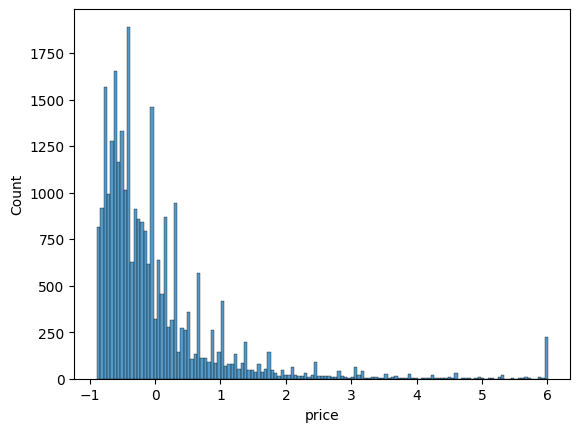

In [8]:
# plot on a specific feature using Seaborn
sns.histplot(data=df, x="price")

df['price'].describe(include='all')

In [9]:
step_size = 0.25
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
num_listings = df.shape[0]
bin_right = min_price + step_size

print(f'Price range: [{min_price:.2}, {max_price:.2}] with range of {range_price:.4}')

# remake as Dataframe?
while bin_right <= max_price + step_size:
    num_listings_in_bin = len(df[df['price'] <= bin_right])
    percentage = round(num_listings_in_bin / num_listings * 100.0, 2)
    range_percent = (100.0 * abs(bin_right - min_price)) / range_price
    print(f'Price [{min_price:.2}, {bin_right:.2}] is {percentage:0.1f}% of samples and {range_percent:0.1f}% of price')
    bin_right += step_size

# Price [-0.89, 0.36] is 80.8% of samples and 18.1% of price

Price range: [-0.89, 6.0] with range of 6.896
Price [-0.89, -0.64] is 19.9% of samples and 3.6% of price
Price [-0.89, -0.39] is 42.0% of samples and 7.3% of price
Price [-0.89, -0.14] is 58.5% of samples and 10.9% of price
Price [-0.89, 0.11] is 71.1% of samples and 14.5% of price
Price [-0.89, 0.36] is 80.8% of samples and 18.1% of price
Price [-0.89, 0.61] is 84.9% of samples and 21.8% of price
Price [-0.89, 0.86] is 88.7% of samples and 25.4% of price
Price [-0.89, 1.1] is 91.8% of samples and 29.0% of price
Price [-0.89, 1.4] is 93.2% of samples and 32.6% of price
Price [-0.89, 1.6] is 94.7% of samples and 36.3% of price
Price [-0.89, 1.9] is 95.7% of samples and 39.9% of price
Price [-0.89, 2.1] is 96.3% of samples and 43.5% of price
Price [-0.89, 2.4] is 96.7% of samples and 47.1% of price
Price [-0.89, 2.6] is 97.2% of samples and 50.8% of price
Price [-0.89, 2.9] is 97.5% of samples and 54.4% of price
Price [-0.89, 3.1] is 97.8% of samples and 58.0% of price
Price [-0.89, 3.4]

### Count the number of rows with missing values
Ordered by most to fewest missing values

In [10]:
nan_count = np.sum(df.isnull(), axis = 0).sort_values(ascending=False)
nan_count

host_is_superhost                               0
calculated_host_listings_count_private_rooms    0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
review_scores_rating                            0
review_scores_cleanliness                       0
review_scores_checkin                           0
review_scores_communication                     0
review_scores_location                          0
review_scores_value                             0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_shared_rooms     0
host_has_profile_pic                            0
reviews_per_month                               0
n_host_verifications                            0
neighbourhood_group_cleansed_Bronx              0
neighbourhood_group_cleansed_Brooklyn           0
neighbourhood_group_cleansed_Manhattan          0
neighbourhood_group_cleansed_Queens             0


# Looking for outliers


### Method 1: Calculating the min and max z-scores for each numeric column

Ideally the z-scores should vary between [-2,2] aka 95%, or [-3,3] aka 99.7%

In [11]:
# # initialize empty dict for storing results inside the loop
# # TODO: convert into simpler format

# schema={'Column Name': 'object',
#         'Z-Score Min': 'float64',
#         'Z-Score Max': 'float64',
#         'Max Abs Zscore': 'float64'}

# df_zscores = pd.DataFrame(columns=schema.keys()).astype(schema)

# for column in numeric_column_names:
#     a = max(stats.zscore(df[column], axis=None))
#     b = min(stats.zscore(df[column], axis=None))
#     c = max(abs(a), abs(b))
#     new_row = pd.DataFrame([{'Column Name': column,
#            'Z-Score Min': a,
#            'Z-Score Max': b,
#            'Max Abs Zscore': c}])
#     df_zscores = pd.concat([df_zscores, new_row], ignore_index=True)

# df_zscores.reset_index()
# df_zscores.sort_values('Max Abs Zscore', ascending=False, inplace=True)

# # last - for display
# df_zscores.round(2).head(20)

### Finding outliers - Method 2: using the Interquadrant Range

In [12]:
# TODO: load into a dataframe for easier analysis
print(f'Number of samples outside IQR for column, out of {num_rows} total rows:')
IQR_FORMAT_STRING="{:<20} {:<8} {:<4.3}%"

iqr_outlier_dict = {}

# iterate through each numeric column
for column in numeric_column_names:
    # define first and third quartiles
    Q3 = np.quantile(df[column], 0.75)
    Q1 = np.quantile(df[column], 0.25)
    IQR = Q3 - Q1
    # calculate the number of samples outside that range
    s = ((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))).sum()
  
    iqr_outlier_dict[column] = s

iqr_outlier_list = sorted(iqr_outlier_dict.items(), key=lambda x:x[1],
                          reverse=True)

for key, val in iqr_outlier_list:
    iter_percentage = val / num_rows * 100.0
    print(IQR_FORMAT_STRING.format(key, val, iter_percentage))

Number of samples outside IQR for column, out of 28022 total rows:
bedrooms             5869     20.9%
calculated_host_listings_count_private_rooms 4533     16.2%
calculated_host_listings_count 4378     15.6%
bathrooms            4239     15.1%
host_listings_count  4024     14.4%
host_total_listings_count 4024     14.4%
neighbourhood_group_cleansed_Queens 4003     14.3%
number_of_reviews_ltm 3985     14.2%
number_of_reviews    3353     12.0%
calculated_host_listings_count_entire_homes 3346     11.9%
number_of_reviews_l30d 3127     11.2%
review_scores_communication 3009     10.7%
review_scores_checkin 2831     10.1%
reviews_per_month    2516     8.98%
availability_30      2411     8.6 %
host_acceptance_rate 2209     7.88%
price                1903     6.79%
review_scores_location 1863     6.65%
host_response_rate   1670     5.96%
review_scores_cleanliness 1659     5.92%
beds                 1619     5.78%
review_scores_value  1262     4.5 %
review_scores_rating 1190     4.25%
neighbourh

# Investigating feature and label correlations
## Plot features against each other to look for relations

Ideally want each feature to have:
* 0 correlation with each other feature
* a correlation of -1 or 1 to the label/target

In [13]:
# Define the list of columns to analyze, by default it will just do the numeric
# columns
columns_to_analyze = numeric_column_names
columns_to_analyze.append(LABEL_COLUMN_NAME)

# create a copy for pairplot
df_numeric_only = df[columns_to_analyze].copy()

# plot it, but only the bottom left triangle/corner, don't need the repeated
# information since it is symmetric
#sns.pairplot(data=df_numeric_only, corner=True)

## Comparing the features to each other with labels

Plots correlations between all the features, also include the label if available

(this is very inefficent with memory for large datsets)


### Correlation Matrix

Analyze the (numeric) columns for correlations

In [14]:
# create a new dataframe that is the correlation matrix of just the
# numeric columns
df_numeric_only_corr = df_numeric_only.corr()

# create another new dataframe that is the lower triangle of the
# previous result
df_lt = df_numeric_only_corr.where(np.tril(np.ones(df_numeric_only_corr.shape)).astype(bool))

# display the simplified correlation matrix for just numeric columns:
df_lt.round(1)

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,price
host_response_rate,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_acceptance_rate,0.4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_listings_count,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_total_listings_count,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,0.0,0.1,-0.0,-0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,0.0,-0.0,0.0,0.0,0.4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,0.0,0.0,-0.0,-0.0,0.7,0.5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
beds,0.0,0.0,-0.0,-0.0,0.8,0.4,0.7,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,0.0,0.0,0.1,0.1,0.5,0.3,0.5,0.4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minimum_nights,-0.1,-0.1,0.0,0.0,-0.1,-0.0,-0.0,-0.1,-0.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


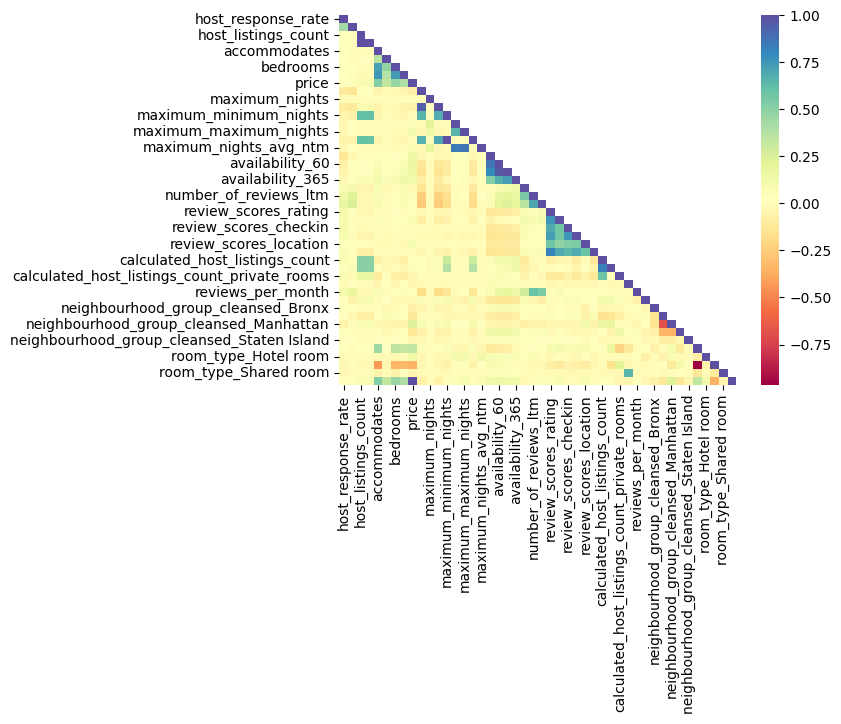

In [15]:
# display a heatmap of the simplified correlation matrix of just
# the numeric columns
hmap=sns.heatmap(df_lt, cmap="Spectral")

### Correlated columns chart

Display a list of the correlated columns in order from highest correlation (in magnitude, closest to -1 or 1) to lowest correlation (closest to zero). We don't care about the sign of the correlation, just the magnitude (absolute value).

In [16]:
# TODO: convert to dataframe?

# intialize an empty list to store results
res = []

# iterate through the column names in alphabetical order for horizontal
for col1 in sorted(df_lt.columns):

    # iterate through the column names in alphabetical order for vertial
    for col2 in sorted(df_lt.columns):
        try:
            # extract the correlation value
            val = df_lt[col1][col2]

            # if the column names match, then skip this one, their correlation 
            # will be one also skip if the answer is None / which is for the top
            # right symmetric portion
            if col1 == col2 or isnan(val):
                continue
        
            # create a name that describes the two columns
            new_col_name = f'{col1}__vs__{col2}'
        
            # add this to the resulting list
            # the first column is the absolute value of the correlation,

            # since I want to sort them by descending magnitude
            res.append([abs(val), val, new_col_name ])
        except:
            continue

# sort the list from highest magnitude to lowest
# the features with the highest correlation with each other may want
# to be removed
res = sorted(res, reverse=True)

# create a format string to design the output table
# < is left aligned     . is sig digs
CORRELATION_VS_COLNAME_FORMAT_STR = "{:>18.3}   {:<36}"

print("Most to least correlated features\n")
print("Correlation [-1,1]   Features/Columns")
print("-------------------------------------")
# loop through and display the relevant results:
for i, correlation, vs_col_name in res:
    print(CORRELATION_VS_COLNAME_FORMAT_STR.format(correlation, vs_col_name))

Most to least correlated features

Correlation [-1,1]   Features/Columns
-------------------------------------
               1.0   host_listings_count__vs__host_total_listings_count
             0.998   maximum_minimum_nights__vs__minimum_nights_avg_ntm
             0.969   availability_60__vs__availability_90
            -0.963   room_type_Entire home/apt__vs__room_type_Private room
             0.942   minimum_nights__vs__minimum_minimum_nights
             0.872   availability_30__vs__availability_60
             0.868   maximum_maximum_nights__vs__maximum_nights_avg_ntm
             0.844   minimum_maximum_nights__vs__maximum_nights_avg_ntm
              0.83   calculated_host_listings_count__vs__calculated_host_listings_count_entire_homes
             0.821   review_scores_rating__vs__review_scores_value
             0.786   availability_30__vs__availability_90
             0.758   review_scores_rating__vs__review_scores_cleanliness
             0.756   review_scores_checkin__vs_

# Show the most important features - which ones have strongest correlation with target (price)

In [17]:
price_correlations = df_lt['price'].copy()
price_correlations = price_correlations.T.loc[~price_correlations.T.index.duplicated(), :].drop(columns='price',axis=0).T
price_correlations.dropna(inplace=True)
price_correlations.rename({'price': 'abs_correlation_with_price'}, inplace=True, axis=1)
price_correlations.index.rename('feature_name', inplace=True)
price_correlations = price_correlations.abs()
price_correlations.sort_values('abs_correlation_with_price', ascending=False, inplace=True)
price_correlations

,abs_correlation_with_price
feature_name,
room_type_Private room,0.355462
room_type_Entire home/apt,0.346902
neighbourhood_group_cleansed_Manhattan,0.237643
availability_60,0.152750
availability_90,0.148228
availability_30,0.146895
neighbourhood_group_cleansed_Queens,0.132096
room_type_Hotel room,0.127915
availability_365,0.123984


<Axes: xlabel='abs_correlation_with_price', ylabel='Count'>

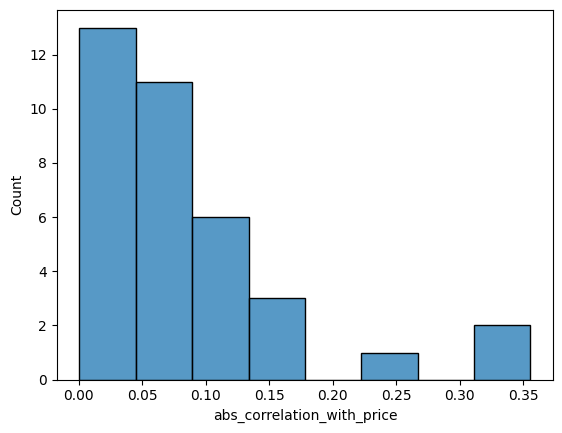

In [18]:
sns.histplot(data=price_correlations, x="abs_correlation_with_price")

In [19]:
# Total number of features
total_number_of_features = df.shape[1] - 1
percent_with_numeric_corr = price_correlations.shape[0] / total_number_of_features
print(f'Total number of features in dataset: {total_number_of_features}')
print(f'Percentage of features that have numeric correlation: {percent_with_numeric_corr*100.0:0.1f}%')
min_target_correlation_to_keep = 0.05
print(f'Min correlation with target to keep: {min_target_correlation_to_keep*100:0.1f}%')
features_to_keep_list = price_correlations[price_correlations["abs_correlation_with_price"] >= min_target_correlation_to_keep].index.tolist()
num_features_kept = len(features_to_keep_list)
print(f'Num features that would be kept: {num_features_kept} , or {num_features_kept / total_number_of_features * 100.0:0.1f}% of all features')

features_to_keep_list.append('price')
features_to_keep_list

Total number of features in dataset: 49
Percentage of features that have numeric correlation: 73.5%
Min correlation with target to keep: 5.0%
Num features that would be kept: 20 , or 40.8% of all features


['room_type_Private room',
 'room_type_Entire home/apt',
 'neighbourhood_group_cleansed_Manhattan',
 'availability_60',
 'availability_90',
 'availability_30',
 'neighbourhood_group_cleansed_Queens',
 'room_type_Hotel room',
 'availability_365',
 'neighbourhood_group_cleansed_Brooklyn',
 'maximum_maximum_nights',
 'review_scores_location',
 'maximum_nights_avg_ntm',
 'review_scores_cleanliness',
 'minimum_nights',
 'neighbourhood_group_cleansed_Bronx',
 'minimum_minimum_nights',
 'minimum_maximum_nights',
 'number_of_reviews_ltm',
 'calculated_host_listings_count_entire_homes',
 'price']

In [20]:
# re-running data leakage:

df_min_features = df[features_to_keep_list]

df_min_features.head()

,room_type_Private room,room_type_Entire home/apt,neighbourhood_group_cleansed_Manhattan,availability_60,availability_90,availability_30,neighbourhood_group_cleansed_Queens,room_type_Hotel room,availability_365,neighbourhood_group_cleansed_Brooklyn,maximum_maximum_nights,review_scores_location,maximum_nights_avg_ntm,review_scores_cleanliness,minimum_nights,neighbourhood_group_cleansed_Bronx,minimum_minimum_nights,minimum_maximum_nights,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,price
0,0.0,1.0,1.0,0.656954,0.873381,-0.356395,0.0,0.0,1.494669,0.0,-0.041001,0.263662,-0.03561,0.011584,0.442362,0.0,0.426669,-0.026744,-0.409357,-0.09812,-0.030031
1,0.0,1.0,0.0,-0.626587,-0.458538,-0.356395,0.0,0.0,0.458908,1.0,-0.041006,-0.097167,-0.035616,-0.214944,-0.691838,0.0,-0.655799,-0.026751,1.511098,-0.174687,-0.562648
2,0.0,1.0,0.0,-0.769202,-0.636127,-0.356395,0.0,0.0,-0.051779,1.0,-0.041001,-0.602328,-0.03561,0.673742,-0.535396,0.0,-0.506493,-0.026744,-0.349343,-0.174687,0.857665
3,1.0,0.0,1.0,-0.151201,0.015034,-0.572258,0.0,0.0,0.444523,0.0,-0.041014,0.287717,-0.035627,-1.539261,-0.652727,0.0,-0.618472,-0.026764,1.571112,-0.21297,-0.612359
4,1.0,0.0,1.0,-0.911818,-0.991305,-0.68019,0.0,0.0,-0.936492,0.0,-0.041014,0.456104,-0.035627,0.360088,-0.652727,0.0,-0.618472,-0.026764,-0.409357,-0.21297,-0.562648


In [21]:
# create a new dataframe that is the correlation matrix of just the
# numeric columns
df_min_features_corr = df_min_features.corr()

# create another new dataframe that is the lower triangle of the
# previous result
df_min_features_corr_lt = df_min_features_corr.where(np.tril(np.ones(df_min_features_corr.shape)).astype(bool))

# display the simplified correlation matrix for just numeric columns:
df_min_features_corr_lt.round(1)

,room_type_Private room,room_type_Entire home/apt,neighbourhood_group_cleansed_Manhattan,availability_60,availability_90,availability_30,neighbourhood_group_cleansed_Queens,room_type_Hotel room,availability_365,neighbourhood_group_cleansed_Brooklyn,maximum_maximum_nights,review_scores_location,maximum_nights_avg_ntm,review_scores_cleanliness,minimum_nights,neighbourhood_group_cleansed_Bronx,minimum_minimum_nights,minimum_maximum_nights,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,price
room_type_Private room,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
room_type_Entire home/apt,-1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood_group_cleansed_Manhattan,-0.1,0.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability_60,0.1,-0.1,-0.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability_90,0.1,-0.1,-0.1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability_30,0.1,-0.1,-0.0,0.9,0.8,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood_group_cleansed_Queens,0.1,-0.1,-0.3,0.1,0.1,0.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
room_type_Hotel room,-0.1,-0.1,0.1,0.1,0.1,0.1,-0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability_365,-0.0,-0.0,-0.0,0.7,0.7,0.5,0.1,0.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood_group_cleansed_Brooklyn,0.0,-0.0,-0.7,-0.1,-0.1,-0.1,-0.3,-0.1,-0.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
price_threshold = 0.36 # 0.36 is the lower 80% of all samples
low_price = df_min_features[df_min_features['price'] < price_threshold]
high_price  = df_min_features[df_min_features['price'] >= price_threshold]

low_price_downsampled = resample(low_price,
             replace=True,
             n_samples=len(high_price),
             random_state=42)

data_downsampled = pd.concat([low_price_downsampled, high_price])

In [23]:
outfile = os.path.splitext(input_filename)[0] + "_reduced_features_downsampled.csv"
df_min_features.to_csv(outfile, index=False)
print(f'Data saved to new CSV file:\n{outfile}')


Data saved to new CSV file:
/Users/the-molecular-man/source_code/portfolio_examples/python/predicting_airbnb_prices/data/airbnb_readytofit.csv_reduced_features_downsampled.csv
